In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('data.csv')
features = ['P_sist', 'P_dist', 'qPA', 'Pulse', 'BreathFreq']

data['Class'] = data['Class'].astype('category').cat.codes

X = data[features]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)



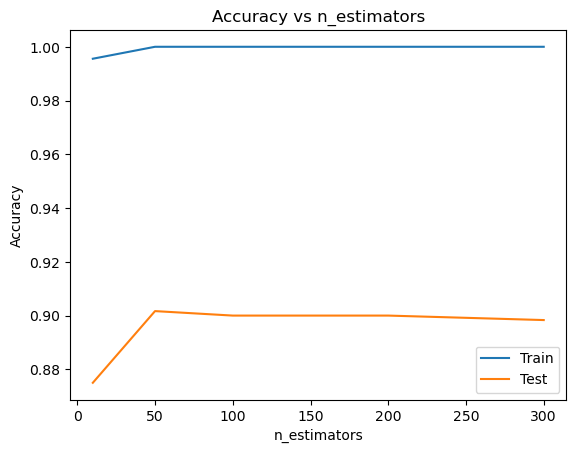

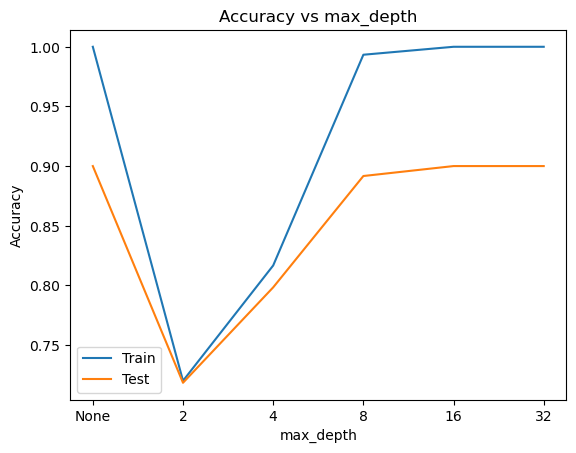

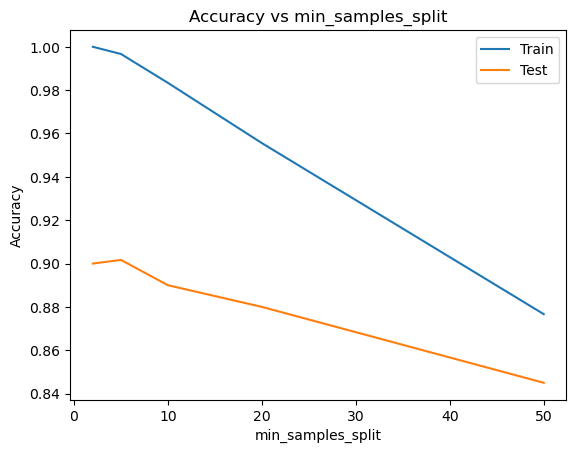

In [3]:
import matplotlib.pyplot as plt

# Listas de hiperparâmetros para testar
n_estimators_list = [10, 50, 100, 200, 300]
max_depth_list = [None, 2, 4, 8, 16, 32]
min_samples_split_list = [2, 5, 10, 20, 50]

# Testando n_estimators
train_acc = []
test_acc = []
for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, rf.predict(X_test)))
plt.figure()
plt.plot(n_estimators_list, train_acc, label='Train')
plt.plot(n_estimators_list, test_acc, label='Test')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.legend()
plt.show()

# Testando max_depth
train_acc = []
test_acc = []
for d in max_depth_list:
    rf = RandomForestClassifier(max_depth=d, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, rf.predict(X_test)))
plt.figure()
plt.plot([str(d) for d in max_depth_list], train_acc, label='Train')
plt.plot([str(d) for d in max_depth_list], test_acc, label='Test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.legend()
plt.show()

# Testando min_samples_split
train_acc = []
test_acc = []
for m in min_samples_split_list:
    rf = RandomForestClassifier(min_samples_split=m, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, rf.predict(X_test)))
plt.figure()
plt.plot(min_samples_split_list, train_acc, label='Train')
plt.plot(min_samples_split_list, test_acc, label='Test')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs min_samples_split')
plt.legend()
plt.show()

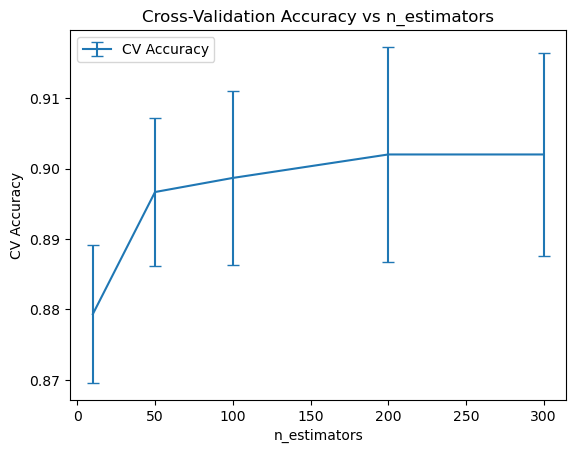

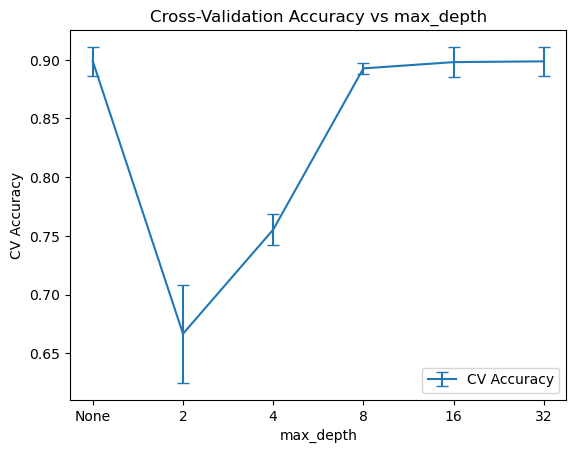

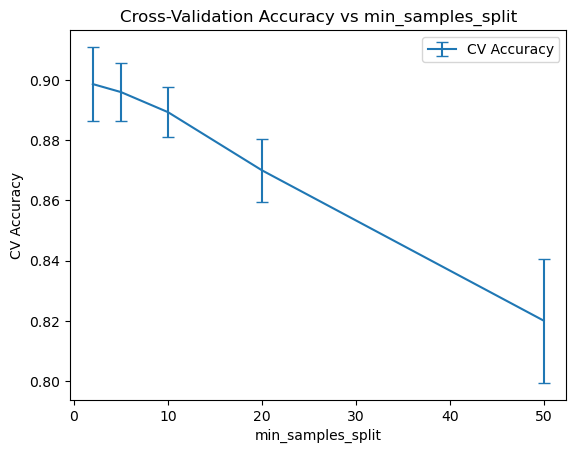

In [4]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# n_estimators
n_estimators_list = [10, 50, 100, 200, 300]
cv_means = []
cv_stds = []
for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())
plt.figure()
plt.errorbar(n_estimators_list, cv_means, yerr=cv_stds, label='CV Accuracy', capsize=4)
plt.xlabel('n_estimators')
plt.ylabel('CV Accuracy')
plt.title('Cross-Validation Accuracy vs n_estimators')
plt.legend()
plt.show()

# max_depth
max_depth_list = [None, 2, 4, 8, 16, 32]
cv_means = []
cv_stds = []
for d in max_depth_list:
    rf = RandomForestClassifier(max_depth=d, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())
plt.figure()
plt.errorbar([str(d) for d in max_depth_list], cv_means, yerr=cv_stds, label='CV Accuracy', capsize=4)
plt.xlabel('max_depth')
plt.ylabel('CV Accuracy')
plt.title('Cross-Validation Accuracy vs max_depth')
plt.legend()
plt.show()

# min_samples_split
min_samples_split_list = [2, 5, 10, 20, 50]
cv_means = []
cv_stds = []
for m in min_samples_split_list:
    rf = RandomForestClassifier(min_samples_split=m, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())
plt.figure()
plt.errorbar(min_samples_split_list, cv_means, yerr=cv_stds, label='CV Accuracy', capsize=4)
plt.xlabel('min_samples_split')
plt.ylabel('CV Accuracy')
plt.title('Cross-Validation Accuracy vs min_samples_split')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import KFold, cross_val_score

# Defina o modelo com os melhores hiperparâmetros encontrados
rf_best = RandomForestClassifier(
    n_estimators=300,
    max_depth=32,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Avalie o modelo usando cross-validation
scores = cross_val_score(rf_best, X, y, cv=kf, scoring='accuracy')

print(f"Acurácias em cada fold: {scores}")
print(f"Acurácia média (cross-validation): {np.mean(scores):.4f}")
print(f"Desvio padrão das acurácias: {np.std(scores):.4f}")

Acurácias em cada fold: [0.92333333 0.88       0.89666667 0.91       0.9       ]
Acurácia média (cross-validation): 0.9020
Desvio padrão das acurácias: 0.0144


In [6]:
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
y_pred_train = rf_best.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Acurácia de treino: {accuracy:.2f}")

accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia de teste: {accuracy:.2f}")

Acurácia de treino: 1.00
Acurácia de teste: 0.90


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Previsões do modelo no conjunto de teste
y_pred = rf_best.predict(X_test)
y_true = y_test

# Métricas de classificação
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Classificação (test set):")
print(f"  Acurácia: {acc:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")

print("Matriz de confusão (test set):")
print(confusion_matrix(y_true, y_pred))

Classificação (test set):
  Acurácia: 0.8983
  Precision: 0.8998
  Recall: 0.8983
  F1-score: 0.8952
Matriz de confusão (test set):
[[ 83  10   0   0]
 [  5 316  12   0]
 [  0  26 136   0]
 [  0   0   8   4]]
